# ^IBOV

## Extraction

### Environment

#### Installations

In [10]:
#pip install yfinance

  Using cached yfinance-0.1.63.tar.gz (26 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23910 sha256=4ad7f66cbcaec49cf1d266f8f5b2a736ee9ba8acc1db87b2c31b517dd3c7e35b
  Stored in directory: /home/mg/.cache/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=c6ff6fda8f7cb206497fd3fdc320438ab1edf93b63104262636102342cb35a09
  Stored in directory: /home/mg/.cache/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


#### Imports

In [5]:
# Extract
import pandas as pd
from datetime import date
import yfinance as yf
from datetime import timedelta

# Visualization
import plotly.express as px
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
#import matplotlib
#import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Test
#from statsmodels.tsa.stattools import adfuller

#### Setting

In [59]:
matplotlib.rcParams['figure.figsize'] = [14, 8]

### Fuctions

In [103]:
def candlestick_v(data_sliced):
    fig = go.Figure(data=[go.Candlestick(x=data_sliced.index,
                open=data_sliced['open'],
                high=data_sliced['high'],
                low=data_sliced['low'],
                close=data_sliced['close'])])

    fig.show()

In [57]:
def download_files_yahoo(tickers=['^BVSP']):
    '''
    --> Download files from yahoo finance related brazilian indexes
    
    :param tickers: List with description of tickers to download
    '''
    for index in tickers:
        data = yf.download(index, start="2021-01-01", end=today)
        data = pd.DataFrame(data['Adj Close'])
        data.columns = [index]
    return data

In [104]:
def candlestick_dv(ticker):
    '''
    --> Download information from Yahoo Finance and show candlestick of last 30 days

    :param ticker: Company ticker selected
    '''
    for stock in ticker:
        today = date.today()
        last_30_days = timedelta(30)
        start = today - last_30_days
        data = yf.download(tickers=stock, start=start, end=today)
        fig = go.Figure(data=[go.Candlestick(x=data.index,
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close'])])

        fig.show()

### Downloads

In [12]:
today = date.today()

In [13]:
data = yf.download('^BVSP', start="2015-01-01", end=today)

[*********************100%***********************]  1 of 1 completed


In [17]:
data.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

### Data Types

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1634 entries, 2015-01-02 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       1634 non-null   float64
 1   high       1634 non-null   float64
 2   low        1634 non-null   float64
 3   close      1634 non-null   float64
 4   adj_close  1634 non-null   float64
 5   volume     1634 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 89.4 KB


### Data Slice

In [84]:
data_30 = data.iloc[-30:]
data_7 = data.iloc[-7:]
data_365 = data.iloc[-365:]

## Data Analysis

### Stationarity Test

In [46]:
px.line(data, x=data.index, y='adj_close', title='^IBOV 2015-2021')

In [47]:
print(f"P-value (2015 - 2021): {round(adfuller(data['adj_close'])[1], 2)}")

P-value (2015 - 2021): 0.74


P-value grather than 0.05 reject the stationarity of the series

In [48]:
px.line(data['adj_close'][-365:], title='^IBOV Last 365 days')

In [49]:
print(f"P-value last 365 days: {round(adfuller(data['adj_close'][-365:])[1], 2)}")

P-value last 365 days: 0.79


In [50]:
px.line(data['adj_close'][-30:], title='^IBOV Last 30 days')

In [51]:
print(f"P-value last 30 days: {round(adfuller(data['adj_close'][-30:])[1], 2)}")

P-value last 30 days: 0.92


In [52]:
px.line(data['adj_close'][-7:], title='^IBOV Last 7 days')

In [53]:
print(f"P-value last 7 days: {round(adfuller(data['adj_close'][-7:])[1], 2)}")

P-value last 7 days: 0.73


Stationarity Results

Analysing the stationarity in 5 years, 365 days, 30 days and 7 days the all series is not stationarity

### Autocorrelation

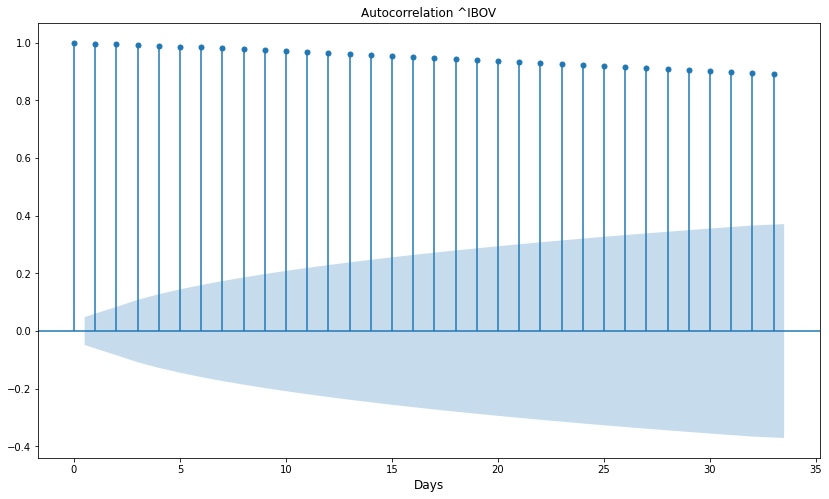

In [63]:
plot_acf(data['adj_close'], title='Autocorrelation ^IBOV')
plt.xlabel('Days', fontsize=12);

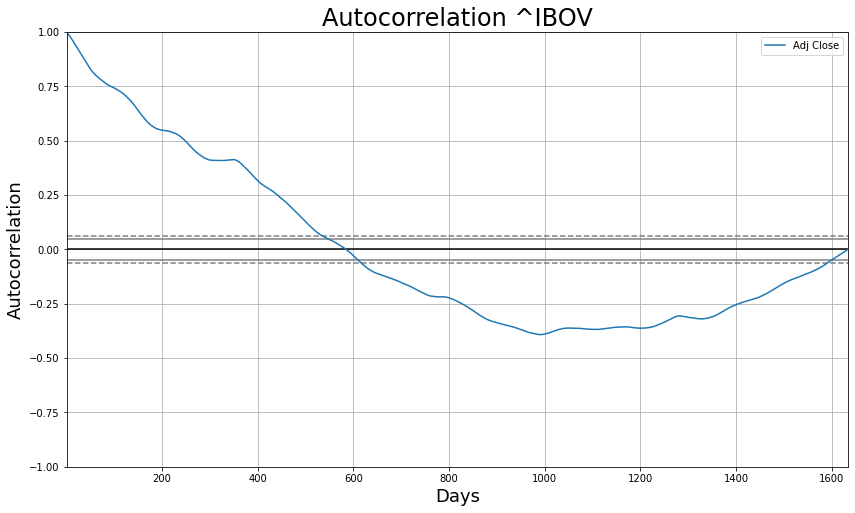

In [89]:
autocorrelation_plot(data['adj_close'],
                     label='Adj Close')
plt.title('Autocorrelation ^IBOV', fontsize=24)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Autocorrelation', fontsize=18);

### Candlestick

In [46]:
cdi = pd.read_csv('../data/cdi.csv')
inpc = pd.read_csv('../data/inpc.csv')
ipca = pd.read_csv('../data/ipca.csv')
savings = pd.read_csv('../data/savings.csv')
selic = pd.read_csv('../data/selic.csv')

In [53]:
ipca

,date,%
0,201503,1.32
1,201504,0.71
2,201505,0.74
3,201506,0.79
4,201507,0.62
...,...,...
72,202103,0.93
73,202104,0.31
74,202105,0.83
75,202106,0.53


In [54]:
today = date.today()
last_30_days = timedelta(5)
start = today - last_30_days
data = yf.download(tickers='ABEV3.SA', start=start, end=today)

[*********************100%***********************]  1 of 1 completed


In [55]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,17.160000,17.379999,17.040001,17.260000,17.260000,17593400
2021-09-02,17.120001,17.120001,16.389999,16.520000,16.520000,36473800
2021-09-03,16.639999,16.760000,16.440001,16.559999,16.559999,40771400
